In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install matplotlib pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
#QUESTION 1

 

# Step 1: Import necessary libraries
import pandas as pd

 

# Step 2: Import the dataset
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user"
users = pd.read_csv(url, sep='|')

 

# Step 4: Discover mean age per occupation
mean_age_by_occupation = users.groupby('occupation')['age'].mean()

 

# Step 5: Discover Male ratio per occupation and sort
male_ratio_by_occupation = (users[users['gender'] == 'M'].groupby('occupation')['gender'].count() / users.groupby('occupation')['gender'].count()).sort_values(ascending=False)

 

# Step 6: Calculate minimum and maximum ages per occupation
age_range_by_occupation = users.groupby('occupation')['age'].agg([min, max])

 

# Step 7: Calculate mean age per combination of occupation and sex
mean_age_by_combination = users.groupby(['occupation', 'gender'])['age'].mean()

 

# Step 8: Calculate percentage of women and men per occupation
gender_percentage_by_occupation = (users.groupby('occupation')['gender'].value_counts(normalize=True) * 100).unstack()

 

# Print the results
print("Mean Age per Occupation:")
print(mean_age_by_occupation)

 

print("\nMale Ratio per Occupation:")
print(male_ratio_by_occupation)

 

print("\nAge Range per Occupation:")
print(age_range_by_occupation)

 

print("\nMean Age per Combination of Occupation and Sex:")
print(mean_age_by_combination)

 

print("\nPercentage of Women and Men per Occupation:")
print(gender_percentage_by_occupation)

Mean Age per Occupation:
occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

Male Ratio per Occupation:
occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other            0.6

In [12]:
#QUESTION 2

 

import pandas as pd

 

# Step 1: Import the necessary libraries

 

# Step 2: Import the dataset from the given address
url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv"
euro12 = pd.read_csv(url)

 

# Step 3: Assign it to a variable called euro12

 

# Step 4: Select only the Goal column
goals = euro12['Goals']

 

# Step 5: How many teams participated in Euro2012?
num_teams = euro12['Team'].nunique()

 

# Step 6: What is the number of columns in the dataset?
num_columns = euro12.shape[1]

 

# Step 7: View only the columns Team, Yellow Cards, and Red Cards
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]

 

# Step 8: Sort the teams by Red Cards, then by Yellow Cards
discipline_sorted = discipline.sort_values(by=['Red Cards', 'Yellow Cards'], ascending=False)

 

# Step 9: Calculate the mean Yellow Cards given per Team
mean_yellow_cards_per_team = discipline['Yellow Cards'].mean()

 

# Display the results
print("Number of teams participated in Euro2012:", num_teams)
print("Number of columns in the dataset:", num_columns)
print("Mean Yellow Cards given per Team:", mean_yellow_cards_per_team)

Number of teams participated in Euro2012: 16
Number of columns in the dataset: 35
Mean Yellow Cards given per Team: 7.4375


In [4]:
#QUESTION 3

 

# Step 1: Import necessary libraries
import pandas as pd
import numpy as np

 

# Step 2: Create Series
series_1 = pd.Series(np.random.randint(1, 5, size=100))
series_2 = pd.Series(np.random.randint(1, 4, size=100))
series_3 = pd.Series(np.random.randint(10000, 30001, size=100))

 

# Step 3: Create DataFrame by joining the Series by column
data = pd.concat([series_1, series_2, series_3], axis=1)
data.columns = ['bedrs', 'bathrs', 'price_sqr_meter']

 

# Step 4: Change column names
data.columns = ['bedrs', 'bathrs', 'price_sqr_meter']

 

# Step 5: Create one column DataFrame
bigcolumn = pd.concat([series_1, series_2, series_3], ignore_index=True)

 

# Step 6: Check if it goes only until index 99
print("Is it true that bigcolumn goes only until index 99?", bigcolumn.index.max() == 99)

 

# Step 7: Reindex the DataFrame
bigcolumn = bigcolumn.reset_index(drop=True)

 

# Print the results
print("\nDataFrame:")
print(data)
print("\nOne Column DataFrame - 'bigcolumn':")
print(bigcolumn)

Is it true that bigcolumn goes only until index 99? False

DataFrame:
    bedrs  bathrs  price_sqr_meter
0       2       1            18226
1       2       1            29807
2       3       1            22396
3       1       3            12471
4       4       3            15714
..    ...     ...              ...
95      1       1            18759
96      1       3            27961
97      1       3            20823
98      4       3            17959
99      1       1            21834

[100 rows x 3 columns]

One Column DataFrame - 'bigcolumn':
0          2
1          2
2          3
3          1
4          4
       ...  
295    18759
296    27961
297    20823
298    17959
299    21834
Length: 300, dtype: int32


In [5]:
#QUESTION 4

 

# Step 1: Import necessary libraries
import pandas as pd

 

# Step 2: Import the dataset from the local file
file_path = "C:\\Users\\GREATJOE COMPUTERS\\Downloads\\wind.txt"  
data = pd.read_table(file_path, sep='\s+', parse_dates=[[0, 1, 2]])

 

# Step 4: Fix year 2061
def fix_year(year):
    if year > 2000:
        return year - 100
    else:
        return year

 

data['Yr_Mo_Dy'] = data['Yr_Mo_Dy'].apply(lambda x: x.replace(year=fix_year(x.year)))

 

# Step 5: Set datetime index
data.set_index('Yr_Mo_Dy', inplace=True)

 

# Step 6: Count missing values per location
missing_values_per_location = data.isnull().sum()

 

# Step 7: Count non-missing values
non_missing_values = data.count().sum()

 

# Step 8: Calculate mean windspeed over all locations and times
mean_windspeed = data.mean().mean()

 

# Step 9: Calculate location statistics
loc_stats = pd.DataFrame({
    'min': data.min(),
    'max': data.max(),
    'mean': data.mean(),
    'std': data.std()
})

 

# Step 10: Calculate daily statistics
day_stats = pd.DataFrame({
    'min': data.min(axis=1),
    'max': data.max(axis=1),
    'mean': data.mean(axis=1),
    'std': data.std(axis=1)
})

 

# Step 11: Average windspeed in January for each location
january_avg_per_location = data[data.index.month == 1].mean()

 

# Step 12: Downsample to yearly frequency
yearly_data = data.resample('Y').mean()

 

# Step 13: Downsample to monthly frequency
monthly_data = data.resample('M').mean()

 

# Step 14: Downsample to weekly frequency
weekly_data = data.resample('W-MON').mean()

 

# Step 15: Weekly statistics for the first 52 weeks
weekly_stats = weekly_data[:52].agg(['min', 'max', 'mean', 'std'])

 

# Print the results
print("Missing Values per Location:")
print(missing_values_per_location)
print("\nNumber of Non-Missing Values:", non_missing_values)
print("\nMean Windspeed over all Locations and Times:", mean_windspeed)
print("\nLocation Statistics:")
print(loc_stats)
print("\nDaily Statistics:")
print(day_stats)
print("\nAverage Windspeed in January for Each Location:")
print(january_avg_per_location)
print("\nYearly Data:")
print(yearly_data)
print("\nMonthly Data:")
print(monthly_data)
print("\nWeekly Data:")
print(weekly_data)
print("\nWeekly Statistics for the First 52 Weeks:")
print(weekly_stats)

Missing Values per Location:
RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

Number of Non-Missing Values: 78857

Mean Windspeed over all Locations and Times: 10.227982360836938

Location Statistics:
      min    max       mean       std
RPT  0.67  35.80  12.362987  5.618413
VAL  0.21  33.37  10.644314  5.267356
ROS  1.50  33.84  11.660526  5.008450
KIL  0.00  28.46   6.306468  3.605811
SHA  0.13  37.54  10.455834  4.936125
BIR  0.00  26.16   7.092254  3.968683
DUB  0.00  30.37   9.797343  4.977555
CLA  0.00  31.08   8.495053  4.499449
MUL  0.00  25.88   8.493590  4.166872
CLO  0.04  28.21   8.707332  4.503954
BEL  0.13  42.38  13.121007  5.835037
MAL  0.67  42.54  15.599079  6.699794

Daily Statistics:
             min    max       mean       std
Yr_Mo_Dy                                    
1961-01-01  9.29  18.50  13.018182  2.808875
1961-01-02  6.50  17.54  11.336364  3.188994
1961-01-03  6.17  18.50  11.64181

In [6]:
#QUESTION 5

 

# Step 1: Import necessary libraries
import pandas as pd

 

# Step 2: Import the dataset
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"
chipo = pd.read_csv(url, sep='\t')

 

# Step 4: See the first 10 entries
first_10_entries = chipo.head(10)

 

# Step 5: Number of observations
num_observations = chipo.shape[0]

 

# Step 6: Number of columns
num_columns = chipo.shape[1]

 

# Step 7: Print column names
column_names = chipo.columns

 

# Step 8: Indexing
index_type = chipo.index

 

# Step 9: Most-ordered item
most_ordered_item = chipo['item_name'].value_counts().idxmax()

 

# Step 10: Quantity of most-ordered item
quantity_ordered_most = chipo[chipo['item_name'] == most_ordered_item]['quantity'].sum()

 

# Step 11: Most ordered item in choice_description
most_ordered_choice = chipo['choice_description'].value_counts().idxmax()

 

# Step 12: Total items ordered
total_items_ordered = chipo['quantity'].sum()

 

# Step 13: Convert item price to float
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))

 

# Step 14: Revenue
revenue = (chipo['quantity'] * chipo['item_price']).sum()

 

# Step 15: Number of orders
num_orders = chipo['order_id'].nunique()

 

# Step 16: Average revenue per order
avg_revenue_per_order = revenue / num_orders

 

# Step 17: Number of different items sold
num_different_items = chipo['item_name'].nunique()

 

# Print the results
print("First 10 Entries:")
print(first_10_entries)
print("\nNumber of Observations:", num_observations)
print("\nNumber of Columns:", num_columns)
print("\nColumn Names:", column_names)
print("\nIndex Type:", index_type)
print("\nMost Ordered Item:", most_ordered_item)
print("\nQuantity of Most Ordered Item:", quantity_ordered_most)
print("\nMost Ordered Choice Description:", most_ordered_choice)
print("\nTotal Items Ordered:", total_items_ordered)
print("\nRevenue:", revenue)
print("\nNumber of Orders:", num_orders)
print("\nAverage Revenue per Order:", avg_revenue_per_order)
print("\nNumber of Different Items Sold:", num_different_items)

First 10 Entries:
   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3            

Matplotlib is building the font cache; this may take a moment.


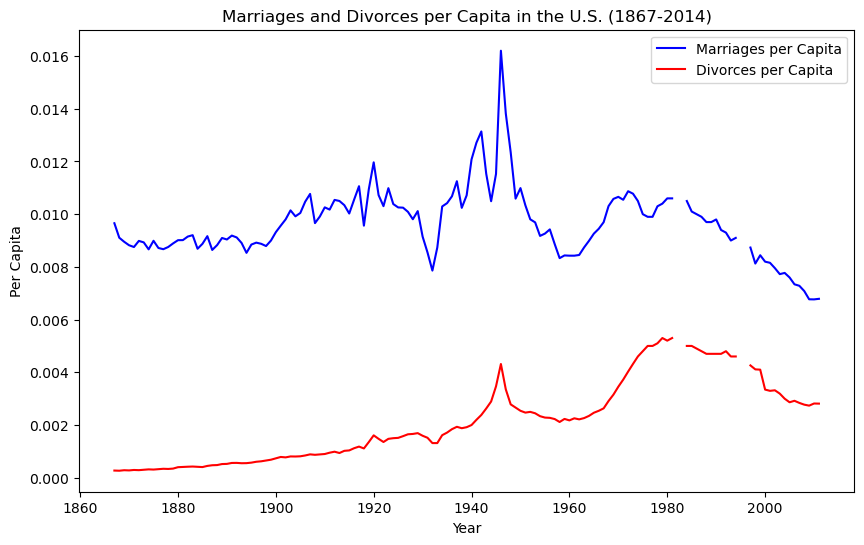

In [7]:
#QUESTION 6

 

import pandas as pd
import matplotlib.pyplot as plt

 

# Step 1: Import the necessary libraries

 

# Step 2: Import the dataset from the local CSV file
file_path = "C:\\Users\\GREATJOE COMPUTERS\\Downloads\\us-marriages-divorces-1867-2014.csv"
data = pd.read_csv(file_path)

 

# Step 3: Filter data for the U.S.
us_data = data[data['Year'] >= 1867]

 

# Step 4: Calculate per capita values
us_data['Marriages_per_capita'] = us_data['Marriages'] / us_data['Population']
us_data['Divorces_per_capita'] = us_data['Divorces'] / us_data['Population']

 

# Step 5: Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(us_data['Year'], us_data['Marriages_per_capita'], label='Marriages per Capita', color='blue')
plt.plot(us_data['Year'], us_data['Divorces_per_capita'], label='Divorces per Capita', color='red')

 

# Step 6: Add labels and legend
plt.xlabel('Year')
plt.ylabel('Per Capita')
plt.title('Marriages and Divorces per Capita in the U.S. (1867-2014)')
plt.legend()

 

# Step 7: Show the plot
plt.show()

C:\Users\GREATJOE COMPUTERS\AppData\Local\Temp\ipykernel_3808\1741258080.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_data_years['Marriages_per_capita'] = us_data_years['Marriages'] / us_data_years['Population']
C:\Users\GREATJOE COMPUTERS\AppData\Local\Temp\ipykernel_3808\1741258080.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_data_years['Divorces_per_capita'] = us_data_years['Divorces'] / us_data_years['Population']


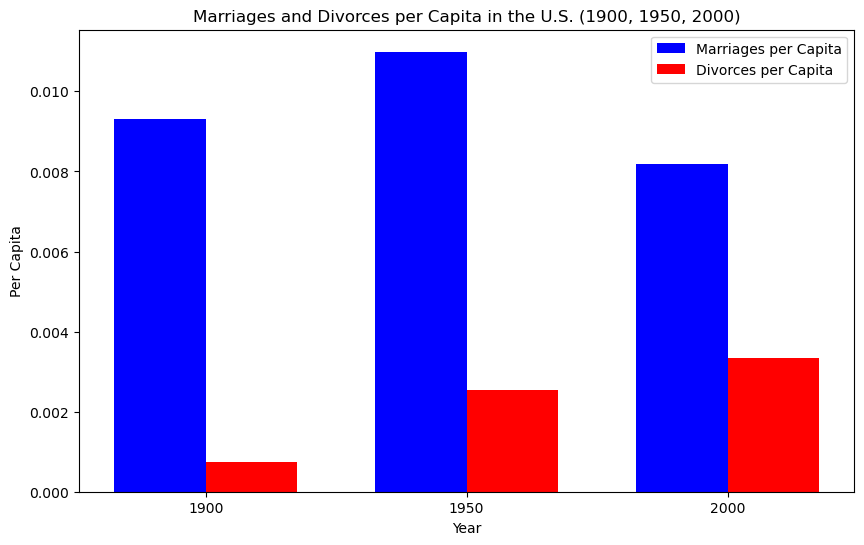

In [8]:
#question 7

 

import pandas as pd
import matplotlib.pyplot as plt

 

# Step 1: Import the necessary libraries

 

# Step 2: Import the dataset from the local CSV file
file_path = "C:\\Users\\GREATJOE COMPUTERS\\Downloads\\us-marriages-divorces-1867-2014.csv"
data = pd.read_csv(file_path)

 

# Step 3: Filter data for the specific years
years = [1900, 1950, 2000]
us_data_years = data[data['Year'].isin(years)]

 

# Step 4: Calculate per capita values
us_data_years['Marriages_per_capita'] = us_data_years['Marriages'] / us_data_years['Population']
us_data_years['Divorces_per_capita'] = us_data_years['Divorces'] / us_data_years['Population']

 

# Step 5: Create the vertical bar chart
plt.figure(figsize=(10, 6))
width = 0.35  # Width of the bars
x = range(len(years))

 

plt.bar(x, us_data_years['Marriages_per_capita'], width, label='Marriages per Capita', color='blue')
plt.bar([i + width for i in x], us_data_years['Divorces_per_capita'], width, label='Divorces per Capita', color='red')

 

plt.xlabel('Year')
plt.ylabel('Per Capita')
plt.title('Marriages and Divorces per Capita in the U.S. (1900, 1950, 2000)')
plt.xticks([i + width / 2 for i in x], years)
plt.legend()

 

# Step 6: Show the plot
plt.show()

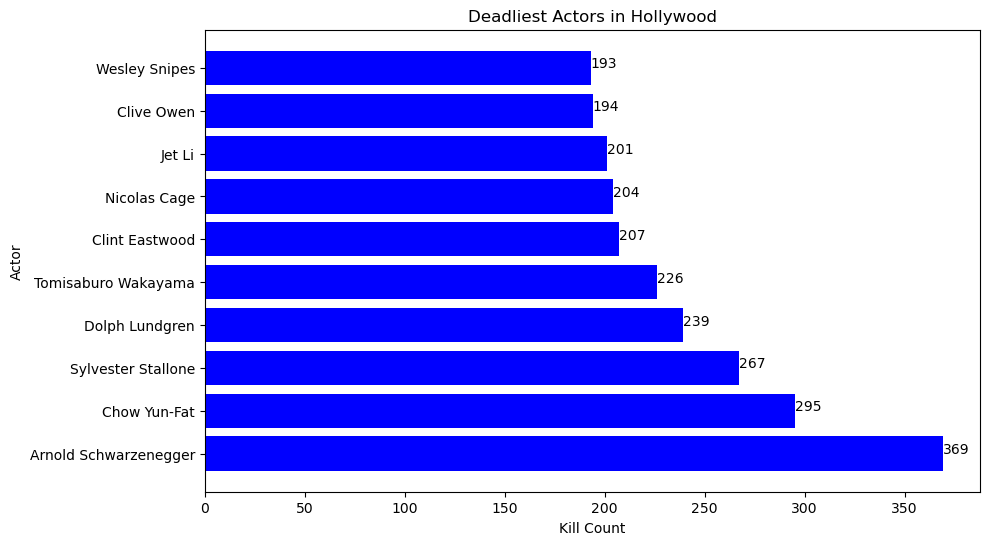

In [9]:
#QUESTION 8

 

import pandas as pd
import matplotlib.pyplot as plt

 

# Step 1: Import the necessary libraries

 

# Step 2: Import the dataset from the local CSV file
file_path = "C:\\Users\\GREATJOE COMPUTERS\\Downloads\\actor_kill_counts.csv"
data = pd.read_csv(file_path)

 

# Step 3: Sort the actors by their kill count
data_sorted = data.sort_values(by='Count', ascending=True)

 

# Step 4: Create the horizontal bar chart
plt.figure(figsize=(10, 6))

 

plt.barh(data_sorted['Actor'], data_sorted['Count'], color='blue')
plt.xlabel('Kill Count')
plt.ylabel('Actor')
plt.title('Deadliest Actors in Hollywood')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest count at the top

 

# Step 5: Add labels to the bars
for index, value in enumerate(data_sorted['Count']):
    plt.text(value, index, str(value))

 

# Step 6: Show the plot
plt.show()

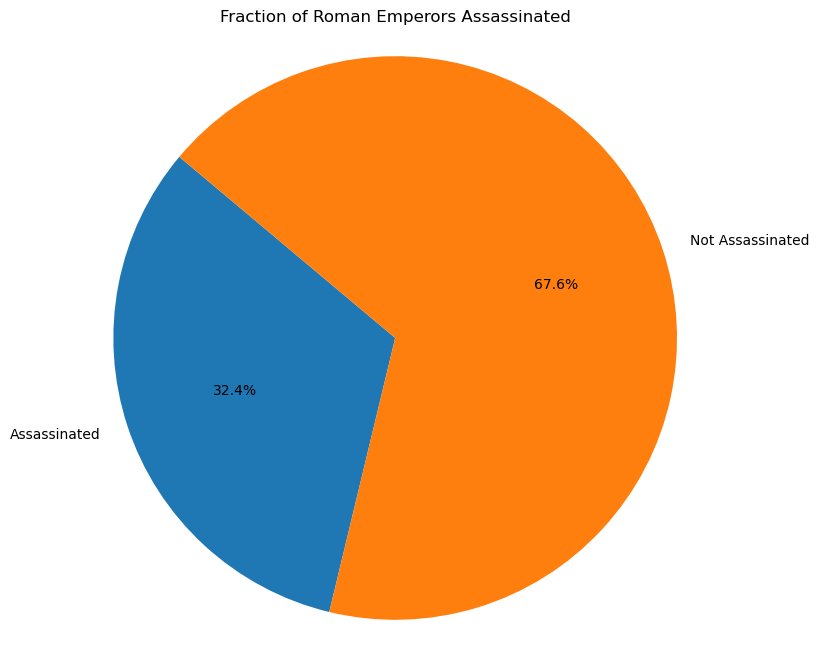

In [10]:
#QUESTION 9

 

 

import pandas as pd
import matplotlib.pyplot as plt

 

# Step 1: Import the necessary libraries

 

# Step 2: Import the dataset from the local CSV file
file_path = "C:\\Users\\GREATJOE COMPUTERS\\Downloads\\roman-emperor-reigns.csv"
data = pd.read_csv(file_path)

 

# Step 3: Calculate the fraction of emperors assassinated
total_emperors = len(data)
assassinated_emperors = data[data['Cause_of_Death'] == 'Assassinated']
num_assassinated = len(assassinated_emperors)
fraction_assassinated = num_assassinated / total_emperors

 

# Step 4: Create the pie chart
labels = ['Assassinated', 'Not Assassinated']
sizes = [fraction_assassinated, 1 - fraction_assassinated]

 

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Fraction of Roman Emperors Assassinated')

 

# Step 5: Show the plot
plt.show()

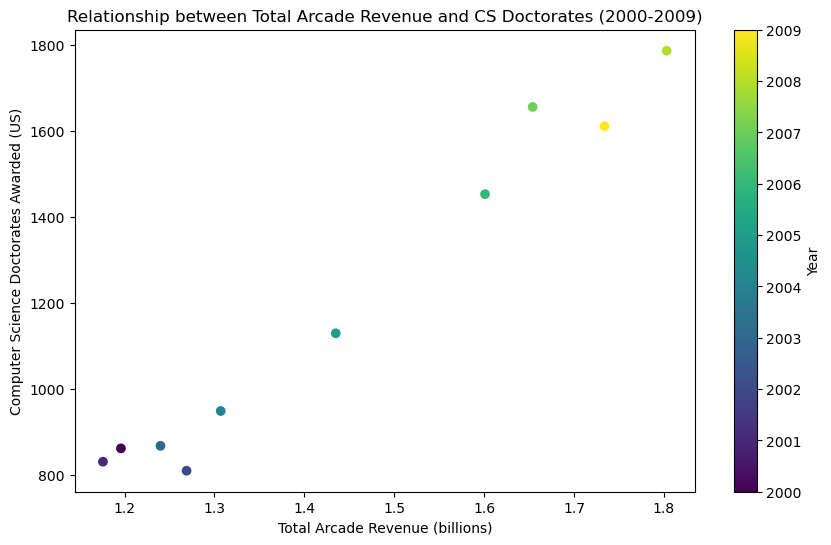

In [11]:
#QUESTION 10

 

import pandas as pd
import matplotlib.pyplot as plt

 

# Step 1: Import the necessary libraries

 

# Step 2: Import the dataset from the local CSV file
file_path = "C:\Users\\GREATJOE COMPUTERS\\Downloads\\arcade-revenue-vs-cs-doctorates.csv"
data = pd.read_csv(file_path)

 

# Step 3: Filter data for the years 2000 to 2009
data_filtered = data[(data['Year'] >= 2000) & (data['Year'] <= 2009)]

 

# Step 4: Create the scatter plot
plt.figure(figsize=(10, 6))

 

plt.scatter(data_filtered['Total Arcade Revenue (billions)'], data_filtered['Computer Science Doctorates Awarded (US)'], c=data_filtered['Year'], cmap='viridis')
plt.colorbar(label='Year')
plt.xlabel('Total Arcade Revenue (billions)')
plt.ylabel('Computer Science Doctorates Awarded (US)')
plt.title('Relationship between Total Arcade Revenue and CS Doctorates (2000-2009)')

 

# Step 5: Show the plot
plt.show()